# Exploratory Data Analysis

- Load in your csv.gz's of results for each year extracted.
    - Concatenate the data into 1 dataframe for the remainder of the analysis.
- Once you have your data from the API, they would like you to perform some light EDA to show:
    1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
        - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
    2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?
    3. What is the average revenue per certification category?
    4. What is the average budget per certification category?

## Import Libraries

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, json, math, time
import tmdbsimple as tmdb
from tqdm.notebook import tqdm_notebook

from matplotlib.ticker import StrMethodFormatter
price_fmt = StrMethodFormatter("${x:,.0f}")
sns.set_style('white')

In [2]:
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [3]:
# Combine into one dataframe
df = pd.concat([df_2000, df_2001])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.112,2245.0,PG


## How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
- Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [4]:
df_movie_values = df[(df['budget'] > 0) | (df['revenue'] > 0)]
df_movie_values.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.112,2245.0,PG


In [5]:
print (f"There are {len(df_movie_values)} movies that had greater than zero budget or revenue.")

There are 639 movies that had greater than zero budget or revenue.


In [6]:
# Save a final merged .csv.gz of all of the tmdb api data 
df_movie_values.to_csv("Data/tmbd_results_combined.csv.gz", 
                                compression="gzip", 
                                index=False)

## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [7]:
df_movie_values['certification'].value_counts()

R        232
PG-13    131
PG        35
NR        17
G         15
Name: certification, dtype: int64

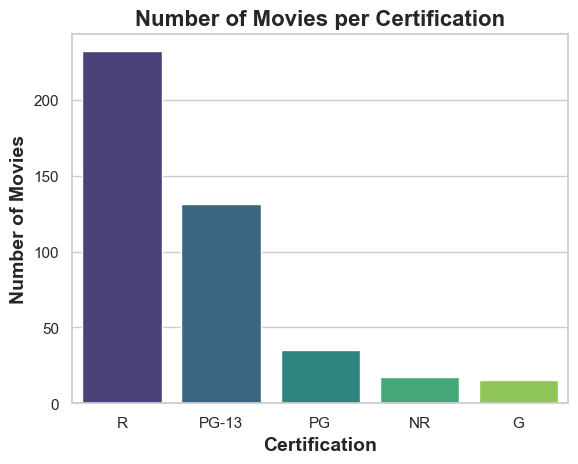

In [32]:
sns.set(style='whitegrid')
ax = sns.barplot(x=df_movie_values['certification'].value_counts().index,
                 y=df_movie_values['certification'].value_counts(),
                 palette='viridis')
ax.set_xlabel('Certification', fontsize=14, weight= 'bold')
ax.set_ylabel('Number of Movies', fontsize=14, weight= 'bold')
ax.set_title('Number of Movies per Certification', fontsize=16, weight= 'bold')
plt.show()

## What is the average revenue per certification category? 

In [8]:
#get the mean revenue for each certification category
revenue_mean_df = df_movie_values.groupby('certification')\
            ['revenue'].agg(['mean']).sort_values('mean', ascending=False).copy()
revenue_mean_df['mean'] = round(revenue_mean_df['mean'],2)
revenue_mean_df

,mean
certification,
G,1.173648e+08
PG,1.106791e+08
PG-13,9.928786e+07
R,3.266001e+07
NR,9.588674e+06


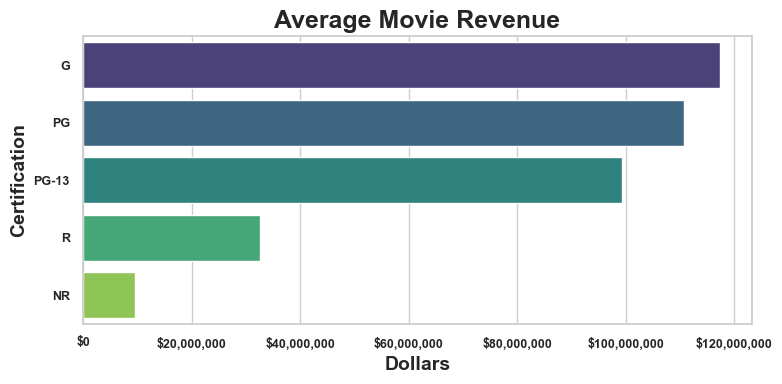

In [23]:
revenue_mean_df = df_movie_values.groupby('certification')['revenue'].mean().reset_index()
revenue_mean_df = revenue_mean_df.sort_values(by='revenue', ascending=False)

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=revenue_mean_df, x='revenue', y=revenue_mean_df['certification'], 
            palette='viridis'); 
plt.title('Average Movie Revenue', fontsize = 18, weight='bold')
plt.xlabel('Dollars', fontsize = 14, weight='bold')
plt.ylabel('Certification', fontsize = 14, weight='bold');
plt.xticks(fontsize = 9, weight='bold')
plt.yticks(fontsize = 9, weight='bold')
ax.xaxis.set_major_formatter(price_fmt)
plt.tight_layout()
plt.show();

## What is the average budget per certification category?

In [24]:
#Grouping the dataframe based on certification and extracting the average budget per certification
budget_mean_df = df_movie_values.groupby('certification')\
            ['budget'].agg(['mean']).sort_values('mean', ascending=False).copy()
budget_mean_df

,mean
certification,
PG,4.482849e+07
PG-13,4.299357e+07
G,3.813333e+07
R,1.945174e+07
NR,6.302358e+06


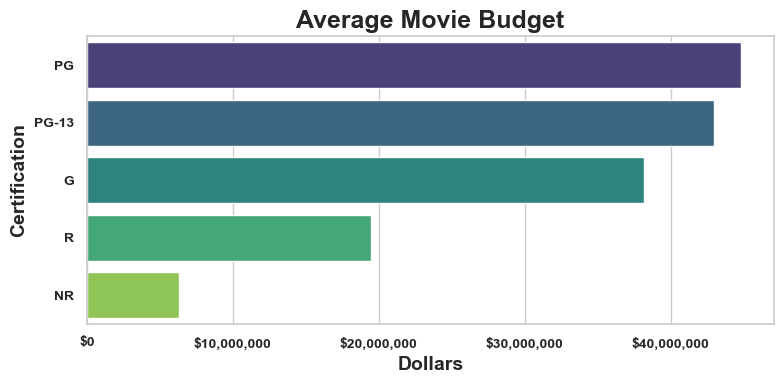

In [26]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(data=budget_mean_df, x='mean', y=budget_mean_df.index, 
            orient='h', 
            palette='viridis'); 
plt.title('Average Movie Budget', fontsize = 18, weight='bold')
plt.xlabel('Dollars', fontsize = 14, weight='bold')
plt.ylabel('Certification', fontsize = 14, weight='bold');
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');
ax.xaxis.set_major_formatter(price_fmt)

plt.tight_layout()
plt.show;